# Análisis de vivienda deshabitada

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
from scipy.stats import gaussian_kde
from pandas.api.types import CategoricalDtype

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/.local/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/edgaregurrola/.local/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Descarga de datos por ciudad

In [2]:
city = 'Queretaro'
res = 8

In [3]:
censo_folder = f'censo_block_10_20_hexres{res}'
query = f'SELECT * FROM censo.{censo_folder} WHERE \"city\" LIKE \'{city}\''
gdf = aup.gdf_from_query(query, geometry_col='geometry')
print(gdf.shape)
gdf.head(2)

(535, 433)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,DensPob_10_20,R_TVivDes_10_20,geometry,city
0,884983ca65fffff,2303.0,1150.0,1142.0,62.0,25.0,27.0,2220.0,1118.0,1102.0,...,0.802600,0.113475,0.146872,0.0,None,0.802600,None,inf,"POLYGON ((-100.36616 20.59528, -100.36160 20.5...",Queretaro
1,8849835201fffff,1289.0,625.0,650.0,48.0,16.0,8.0,1214.0,592.0,622.0,...,0.847727,0.102273,0.393566,0.0,None,0.847727,None,inf,"POLYGON ((-100.37570 20.77430, -100.37114 20.7...",Queretaro


In [4]:
censo_folder = f'censo_10_20_hexres{res}'
query = f'SELECT * FROM censo.{censo_folder} WHERE \"city\" LIKE \'{city}\''
gdf_ageb = aup.gdf_from_query(query, geometry_col='geometry')
print(gdf.shape)
gdf_ageb.head(2)

(535, 433)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,DensPob_10_20,R_TVivDes_10_20,geometry,city


<AxesSubplot:>

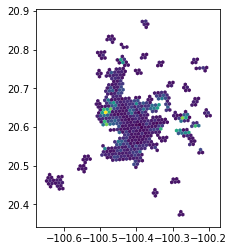

In [5]:
gdf.plot('T_Viv_10_20')

## EDA

Análisis de datos estadísticos

In [6]:
cambio_vivienda_total = gdf.T_Viv_10_20.sum()
cambio_poblacion_total = gdf.T_Pob_10_20.sum()
vivienda_deshabitada_20 = gdf.vivpar_des.sum()
promedio_ocupantes = gdf.prom_ocup.mean()
relacion_cambio_pob_viv = gdf.T_Pob_10_20.sum()/gdf.T_Viv_10_20.sum()
promedio_cambio_viv = gdf.T_Viv_10_20.mean()
mediana_cambio_viv = gdf.T_Viv_10_20.median()
desvest_cambio_viv = gdf.T_Viv_10_20.std()
min_cambio_viv = gdf.T_Viv_10_20.min()
max_cambio_viv = gdf.T_Viv_10_20.max()

In [7]:
print(f'Cambio de vivienda total del 2010 al 2020: {cambio_vivienda_total}')

Cambio de vivienda total del 2010 al 2020: 193398.0


In [136]:
100 * cambio_vivienda_total / gdf['10_vivtot'].sum()

63.4716114210699

In [8]:
print(f'Cambio de población total del 2010 al 2020: {cambio_poblacion_total}')

Cambio de población total del 2010 al 2020: 458575.0


In [137]:
100 * cambio_poblacion_total / gdf['10_pobtot'].sum()

47.95595675571665

In [9]:
print(f'Vivienda deshabitada en 2020: {vivienda_deshabitada_20}')

Vivienda deshabitada en 2020: 49874.0


In [10]:
print(f'Promedio de ocupantes por vivienda en 2020: {promedio_ocupantes}')

Promedio de ocupantes por vivienda en 2020: 3.3364771477929835


In [11]:
print(f'Relación entre el cambio de población y de vivienda del 2010 al 2020: {relacion_cambio_pob_viv} per/viv')

Relación entre el cambio de población y de vivienda del 2010 al 2020: 2.3711465475341007 per/viv


In [12]:
print(f'Promedio de cambio de viviendas por hexágono del 2010 al 2020: {promedio_cambio_viv} viviendas')

Promedio de cambio de viviendas por hexágono del 2010 al 2020: 361.4915887850467 viviendas


In [13]:
print(f'Mediana de cambio de viviendas por hexágono del 2010 al 2020: {mediana_cambio_viv} viviendas')

Mediana de cambio de viviendas por hexágono del 2010 al 2020: 128.0 viviendas


In [14]:
print(f'Desviación estándar de cambio de viviendas por hexágono del 2010 al 2020: {desvest_cambio_viv} viviendas')

Desviación estándar de cambio de viviendas por hexágono del 2010 al 2020: 594.2969309676632 viviendas


In [15]:
print(f'Valor mínimo de cambio de vivienda por hexágono del 2010 al 2020: {min_cambio_viv} viviendas')

Valor mínimo de cambio de vivienda por hexágono del 2010 al 2020: -215.0 viviendas


In [16]:
print(f'Valor máximo de cambio de vivienda por hexágono del 2010 al 2020: {max_cambio_viv} viviendas')

Valor máximo de cambio de vivienda por hexágono del 2010 al 2020: 4271.0 viviendas


Distribución de datos de cambio de viviendas por hexágono

Text(0.5, 6.79999999999999, 'Cambio de vivienda')

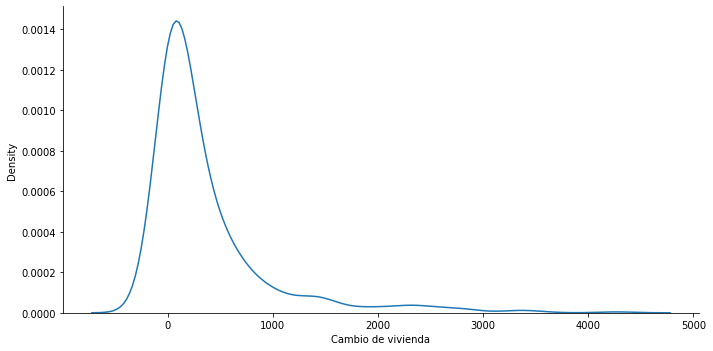

In [17]:
g = sns.displot(data=gdf, x="T_Viv_10_20", kind="kde",
           height=5, aspect=2)
plt.xlabel('Cambio de vivienda')

Text(0.5, 0, 'Cambio de vivienda')

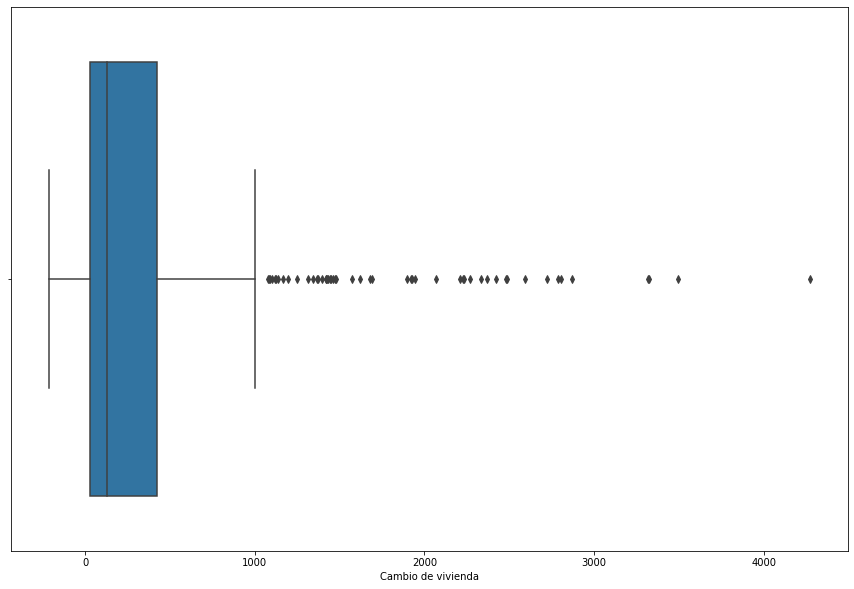

In [18]:
fig, ax = plt.subplots(figsize=(15,10))

# x = np.array(gdf_sq['Metros cuadrados de construcción'])
y = np.array(gdf['T_Viv_10_20'])

sns.boxplot(x=y, ax=ax)

plt.xlabel('Cambio de vivienda')

## Change analysis

### New households

Análisis de zonas que no contaban con vivienda en el 2010 y ahora cuentan con vivienda.

<AxesSubplot:>

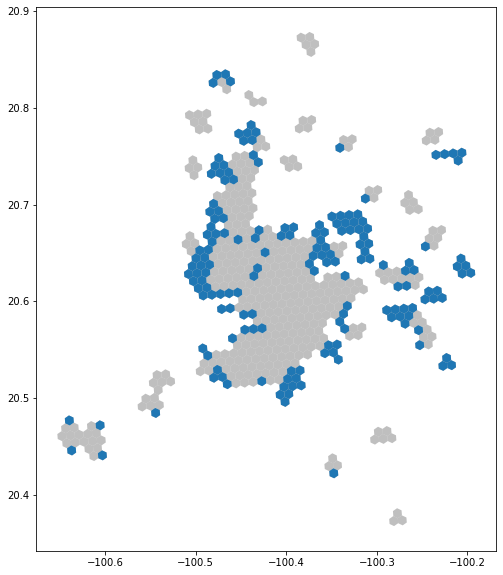

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

gdf[gdf['10_vivtot']==0].plot(ax=ax, zorder=1) #### COMPARTIR
gdf.plot(ax=ax, color='grey', alpha=0.5, zorder=-1)

Viviendas nuevas en áreas que no contaban con vivienda en el 2010.

In [20]:
gdf[gdf['10_vivtot']==0]['vivtot'].sum()

88332.0

In [21]:
pct_new_house = gdf[gdf['10_vivtot']==0]['vivtot'].sum() / gdf.T_Viv_10_20.sum()
print(f'Porcentaje de viviendas nuevas en sitios donde no había vivienda en 2010: {round(pct_new_house*100, 2)}')

Porcentaje de viviendas nuevas en sitios donde no había vivienda en 2010: 45.67


In [22]:
vivpar_new = gdf[gdf['10_vivtot']==0]['tvivparhab'].sum()
print(f'Viviendas particulaes en sitios donde no había vivienda en 2010: {vivpar_new} viviendas particulares')

Viviendas particulaes en sitios donde no había vivienda en 2010: 64871.0 viviendas particulares


In [130]:
pobtot_new = gdf[gdf['10_vivtot']==0]['pobtot'].sum()
print(f'Población total en sitios donde no había vivienda en 2010: {pobtot_new} personas')

Población total en sitios donde no había vivienda en 2010: 196871.0 personas


In [24]:
rel_pob_viv_new = gdf[gdf['10_vivtot']==0]['pobtot'].sum() / gdf[gdf['10_vivtot']==0]['tvivparhab'].sum()
print(f'Relación de población vs vivienda en sitios donde no había vivienda en 2010: {rel_pob_viv_new} per/viv')

Relación de población vs vivienda en sitios donde no había vivienda en 2010: 3.034807541120069 per/viv


In [25]:
pct_new_people = gdf[gdf['10_vivtot']==0]['pobtot'].sum() / gdf.T_Pob_10_20.sum()
print(f'Porcentaje de poblacion nuevas en sitios donde no había nada {round(pct_new_people*100, 2)}')

Porcentaje de poblacion nuevas en sitios donde no había nada 42.93


In [26]:
por_vivpar_new = gdf[gdf['10_vivtot']==0]['tvivparhab'].sum() / gdf[gdf['10_vivtot']==0]['vivtot'].sum()
print(f'Porcentaje de viviendas particulares del total de viviendas en zonas que no había vivienda en 2010: {round(pct_new_people*100,2)}')

Porcentaje de viviendas particulares del total de viviendas en zonas que no había vivienda en 2010: 42.93


### Existing households

Análisis de zonas que contaban con vivienda en 2010.

In [27]:
avg_hab = gdf[gdf['10_vivtot']>0]['tvivparhab'].sum() / gdf[gdf['10_vivtot']>0]['vivtot'].sum()
print(f'Promedio de viviendas ocupadas {round(avg_hab,4) * 100}')

Promedio de viviendas ocupadas 85.38


Visualización de sitios que cuentan con un cambio de vivienda mayor al de la mediana (50 viviendas nuevas por hexágono)

<AxesSubplot:>

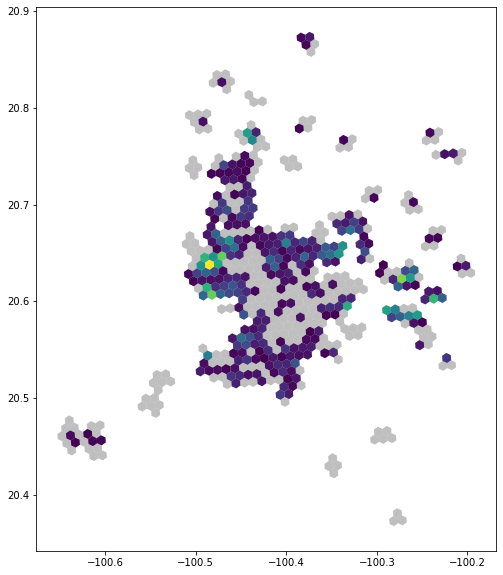

In [28]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[gdf.T_Viv_10_20>=gdf.T_Viv_10_20.median()].plot('T_Viv_10_20', ax=ax)
gdf.plot(ax=ax, color='grey', alpha=0.5, zorder=-1)

Visualización del cambio de vivienda del 2010 al 2020 en zonas que contaban con vivendas en 2010, pero debajo de la mediana.

<AxesSubplot:>

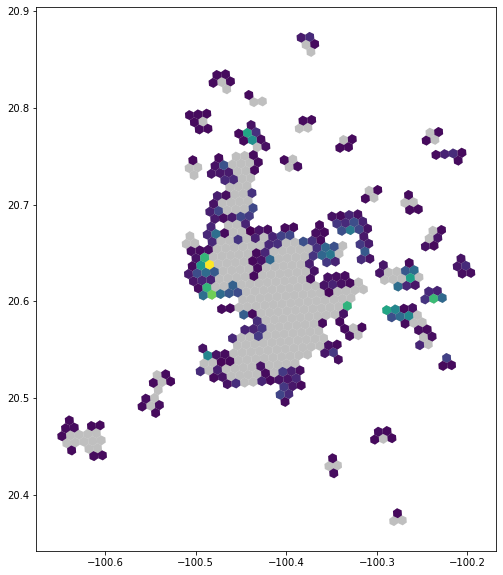

In [29]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']<gdf['10_vivtot'].median())].plot('T_Viv_10_20', ax=ax)
gdf.plot(ax=ax, color='grey', alpha=0.5, zorder=-1)

Visualización del cambio de vivienda del 2010 al 2020 en zonas que contaban con vivendas en 2010, pero debajo de la mediana y que cuentan con un cambio de vivienda mayor al de la mediana.

<AxesSubplot:>

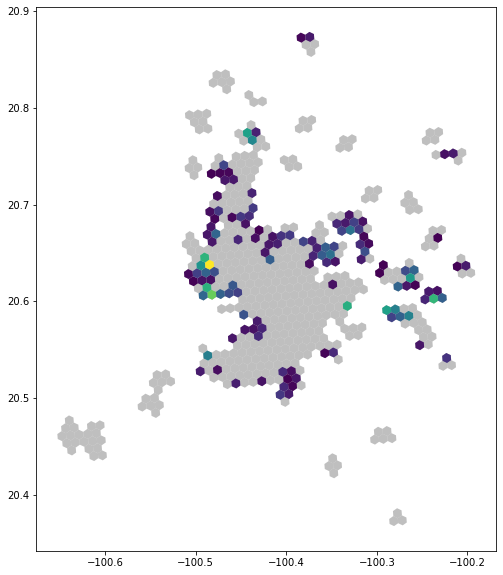

In [30]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']<gdf['10_vivtot'].median())&
    (gdf.T_Viv_10_20>=gdf.T_Viv_10_20.median())].plot('T_Viv_10_20', ax=ax)
gdf.plot(ax=ax, color='grey', alpha=0.5, zorder=-1)

Visualización del cambio de vivienda del 2010 al 2020 en zonas que contaban con vivienda en el 2010 y tuvieron un crecimiento de viviendas totales.

<AxesSubplot:>

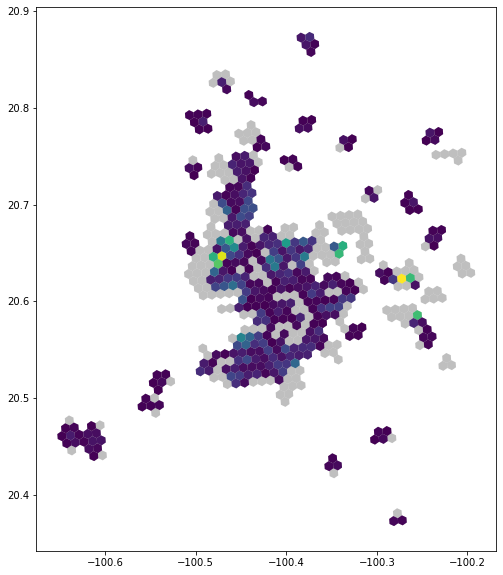

In [31]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']>0)&(gdf.T_Viv_10_20>0)].plot('T_Viv_10_20', ax=ax)
gdf.plot(ax=ax, color='grey', alpha=0.5, zorder=-1)

Visualización del cambio de vivienda del 2010 al 2020 en zonas que contaban con vivienda en el 2010 y tuvieron un crecimiento de viviendas totales mayor al de la mediana.

<AxesSubplot:>

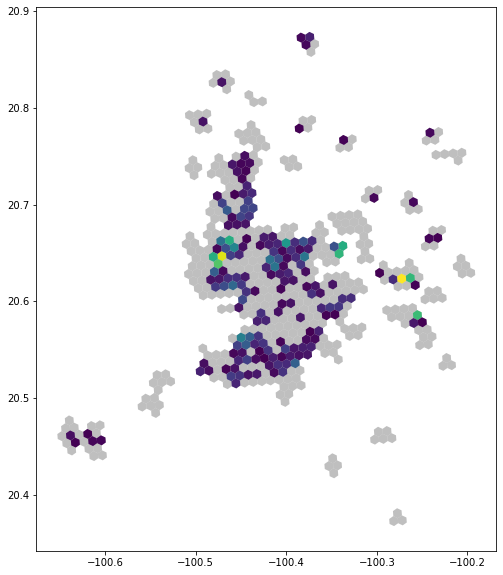

In [32]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']>0)&(gdf.T_Viv_10_20>=gdf.T_Viv_10_20.median())].plot('T_Viv_10_20', ax=ax)
gdf.plot(ax=ax, color='grey', alpha=0.5, zorder=-1)

Visualización de polígonos que perdieron viviendas del 2010 al 2020.

<AxesSubplot:>

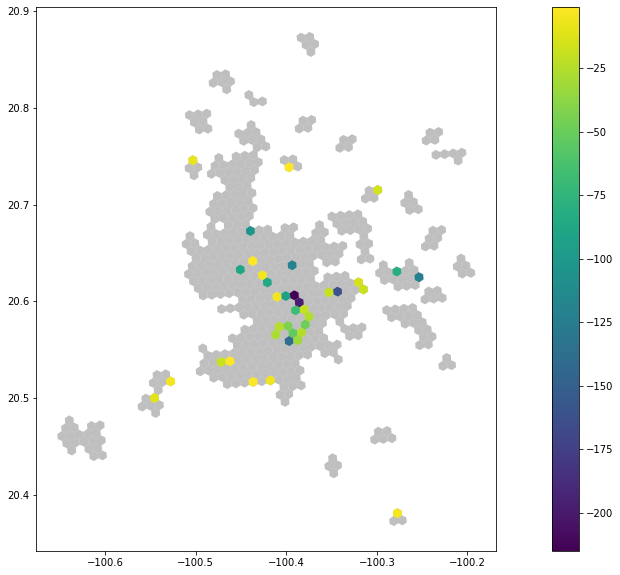

In [148]:
fig, ax = plt.subplots(figsize=(20,10))

gdf[gdf.T_Viv_10_20<0].plot('T_Viv_10_20', legend=True, ax=ax)
gdf.plot(ax=ax, color='grey', alpha=0.5, zorder=-1)

In [150]:
gdf[gdf.T_Viv_10_20<0]['T_Viv_10_20'].max()

-1.0

Suma del cambio de personas en hexágonos que perdieron viviendas del 2010 al 2020.

In [34]:
gdf[gdf.T_Viv_10_20<0]['T_Pob_10_20'].sum()

-14575.0

Total de población que se perdió del 2010 al 2020.

In [35]:
gdf[gdf.T_Pob_10_20<0]['T_Pob_10_20'].sum()

-30082.0

Visualización de los hexágonos donde se perdió población del 2010 al 2020.

<AxesSubplot:>

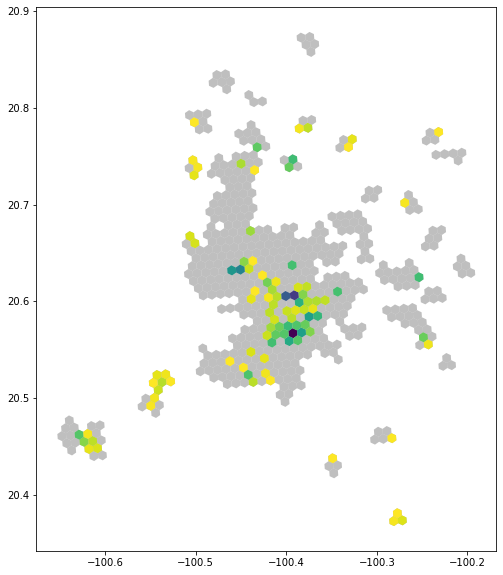

In [147]:
fig, ax = plt.subplots(figsize=(20,10))

gdf[gdf.T_Pob_10_20<0].plot('T_Pob_10_20', ax=ax)
gdf.plot(ax=ax, color='grey', alpha=0.5, zorder=-1)

<AxesSubplot:>

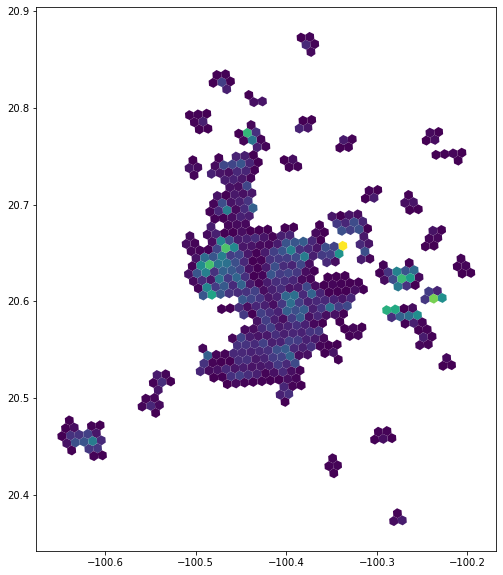

In [37]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.plot('vivpar_des', ax=ax)

<AxesSubplot:>

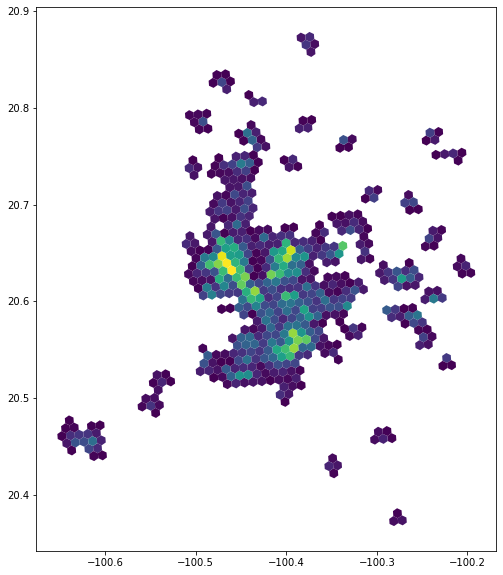

In [131]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.plot('dens_pob_ha', ax=ax)

## 15 minute analysis

In [40]:
method = 'MeanTime'
# grl_dir = '/workspaces/accesibilidad-urbana/data/processed/15_min_city/'
grl_dir = '../../data/processed/15_min_city/'
hex_mean_res8 = gpd.read_file(grl_dir+f'HexRes{res}_{city}_15minAnalisis_v{method}.geojson', driver='GeoJSON')
print(hex_mean_res8.shape)
hex_mean_res8.head(2)

(2106, 67)


,hex_id_8,metropolis,denue_preescolar,denue_primaria,denue_secundaria,denue_escuela_mixta,denue_casa_adultos_mayores,denue_guarderias,denue_dif,denue_biblioteca,...,Farmacias,Hogar,Complementarios,Comercio,Social,Actividad física,Cultural,Entretenimiento,15_min_analysis,geometry
0,884983ca41fffff,Queretaro,5.135353,4.067836,14.843620,4.669619,7.733092,4.732073,5.909845,21.593893,...,2.350311,3.667407,2.923387,5.327319,1.903246,-1.0,6.456674,4.788442,4.788442,"POLYGON ((-100.39477 20.59301, -100.39974 20.5..."
1,884983ca47fffff,Queretaro,4.497457,6.773116,11.693111,4.460351,8.725017,9.475933,4.757304,6.289471,...,3.084009,4.995042,3.782970,6.141609,1.931717,-1.0,8.607539,5.586261,5.586261,"POLYGON ((-100.39477 20.59301, -100.39021 20.5..."


In [41]:
tiempo_limite = 15

In [42]:
hex_mean_res8 = hex_mean_res8[['hex_id_8','15_min_analysis']]

In [43]:
hex_analysis = gdf.merge(hex_mean_res8, on='hex_id_8')

In [44]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum()

4722.0

In [45]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,'hex_id_8'].count() / hex_analysis['hex_id_8'].count()

0.12994350282485875

In [46]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,'hex_id_8'].count() / hex_analysis['hex_id_8'].count()

0.12994350282485875

In [47]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum()

10337.0

In [48]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

133767.0

In [49]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() 

439675.5984733798

In [50]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() * 0.95 * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() 

417691.8185497108

In [51]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum()

397655.0

In [52]:
100 * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum() / hex_analysis.pobtot.sum()

28.10926318111002

In [53]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() - hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum() 

42020.598473379796

In [54]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivpar_des.sum()

8563.0

In [55]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() - hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].tvivparhab.sum()

15823.0

In [56]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

133767.0

In [57]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum()

397655.0

In [58]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].tvivparhab.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

0.881712230968774

In [59]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() 

3.2868764229845913

In [60]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivpar_des.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

0.06401429351035756

In [61]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].R_VivDes_20.mean()

0.06706754613253228

In [62]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum()

0.4568056496082035

In [63]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum()

453712.0

In [64]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum()

182998.0

In [65]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivpar_des.sum()

41296.0

In [66]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

364268.0

In [67]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivpar_des.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

0.11336708137964356

In [68]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].tvivparhab.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

0.8146035336620291

In [69]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].R_VivDes_20.mean()

0.11005700283071979

In [70]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum()

2.4793276429250595

In [71]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

0.502371880044363

In [72]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

0.07727615929190308

<AxesSubplot:>

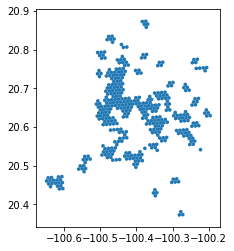

In [73]:
hex_analysis.loc[hex_analysis['15_min_analysis']>20].plot()

In [74]:
gdf['10_prom_ocup'].sum()

0.0

<AxesSubplot:>

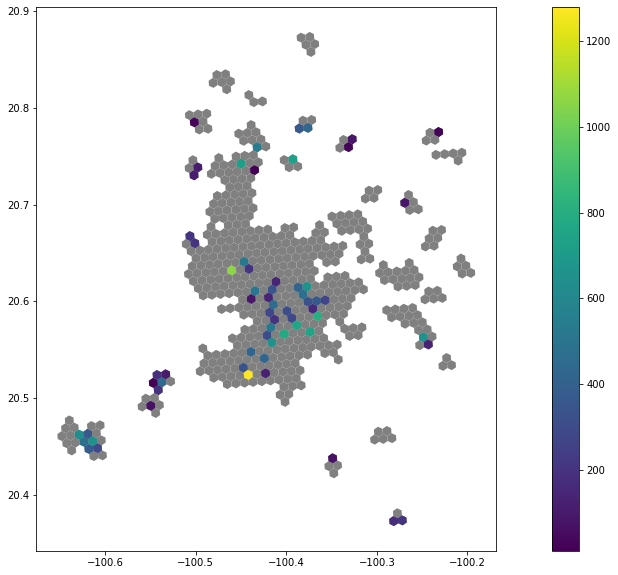

In [75]:
fig, ax = plt.subplots(figsize=(20,10))
hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'loss_relation'] = (hex_analysis.T_Pob_10_20*-1) + (2.5 * hex_analysis.T_Viv_10_20)

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'log_loss_relation'] = np.log(hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                                                                                            (hex_analysis.T_Pob_10_20<0),'loss_relation'])

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0)].plot('loss_relation', legend=True, ax=ax)

gdf.plot(ax=ax, color='grey', zorder=-1)

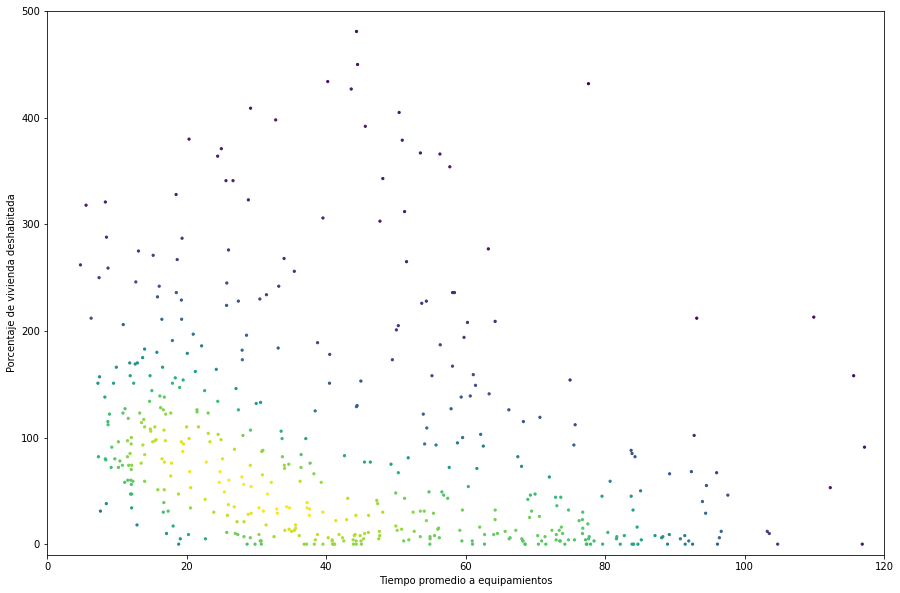

In [77]:
fig, ax = plt.subplots(figsize=(15,10))

hex_analysis['pct_vivpardes'] = hex_analysis['vivpar_des'] / hex_analysis['tvivpar']
idx = hex_analysis.pct_vivpardes.isnull()
hex_scatter = hex_analysis[~idx].copy()

x = np.array(hex_scatter['15_min_analysis'])
y = np.array(hex_scatter['vivpar_des'])
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

ax.scatter(x, y, c=z, s=5, cmap='viridis')

plt.xlabel('Tiempo promedio a equipamientos')
plt.ylabel('Porcentaje de vivienda deshabitada')

ax.set_xlim(0,120)
ax.set_ylim(-10,500)

plt.show()

In [78]:
# x = np.array(hex_corr.imn_2020).reshape((1,-1))
# y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[ 1.        , -0.21250959],
       [-0.21250959,  1.        ]])

## Elementos de salida

In [79]:
hex_analysis['10_pobtot'].sum()

956242.0

In [80]:
datos_estadisticos = {
    'viv_tot_2010' : hex_analysis['10_vivtot'].sum(),
    'viv_tot_2020' : hex_analysis['vivtot'].sum(),
    'cambio_vivtot_10_20' : hex_analysis['T_Viv_10_20'].sum(),
    '%_viv_nueva_10_20' : round(100 * hex_analysis['T_Viv_10_20'].sum() / hex_analysis['10_vivtot'].sum(),2),
    'pob_tot_2010' : hex_analysis['10_pobtot'].sum(),
    'pob_tot_2020' : hex_analysis['pobtot'].sum(),
    'cambio_pobtot_10_20' : hex_analysis['T_Pob_10_20'].sum(),
    '%_pob_nueva_10_20' : round(100*hex_analysis['T_Pob_10_20'].sum() / hex_analysis['10_pobtot'].sum(),2),
    'pob_nueva-viv_nueva' : round(hex_analysis['T_Pob_10_20'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'prom_ocup_10' : 3.49,
    'prom_ocup_20' : round(hex_analysis['prom_ocup'].mean(),2),
    'viv20_sin_viv10' : gdf[gdf['10_vivtot']==0]['vivtot'].sum(),
    '%viv20_sinviv10_cambio_vivtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['vivtot'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'pob20_sin_viv10' : gdf[gdf['10_vivtot']==0]['pobtot'].sum(),
    '%pob20_sinviv10_cambio_pobtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['pobtot'].sum() / hex_analysis['T_Pob_10_20'].sum(),2),
    'cambio_pobtot_10_20_zona_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum(),
    'cambio_vivtot_10_20_zona_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum(),
    'cambio_pobtot_10_20_zona_no_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum(),
    'cambio_vivtot_10_20_zona_no_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum(),
    'perdida_oportunidad_zona_consolidada' : round((hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum() * -1) + 
    (hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum() * 
     (hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].tvivparhab.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()) 
     * round(hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() ,2))),
}

In [81]:
datos_estadisticos

{'viv_tot_2010': 304700.0,
 'viv_tot_2020': 498035.0,
 'cambio_vivtot_10_20': 193335.0,
 '%_viv_nueva_10_20': 63.45,
 'pob_tot_2010': 956242.0,
 'pob_tot_2020': 1414676.0,
 'cambio_pobtot_10_20': 458434.0,
 '%_pob_nueva_10_20': 47.94,
 'pob_nueva-viv_nueva': 2.37,
 'prom_ocup_10': 3.49,
 'prom_ocup_20': 3.34,
 'viv20_sin_viv10': 88332.0,
 '%viv20_sinviv10_cambio_vivtot_10_20': 45.69,
 'pob20_sin_viv10': 196871.0,
 '%pob20_sinviv10_cambio_pobtot_10_20': 42.94,
 'cambio_pobtot_10_20_zona_consolidada': 4722.0,
 'cambio_vivtot_10_20_zona_consolidada': 10337.0,
 'cambio_pobtot_10_20_zona_no_consolidada': 453712.0,
 'cambio_vivtot_10_20_zona_no_consolidada': 182998.0,
 'perdida_oportunidad_zona_consolidada': 25264}

In [82]:
perd_pob_viv_nueva = hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'T_Pob_10_20'].sum()
perd_pob_viv_nueva

-13467.0

In [83]:
viv_nueva_perd_pob = hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'T_Viv_10_20'].sum()
viv_nueva_perd_pob

3821.0

<AxesSubplot:>

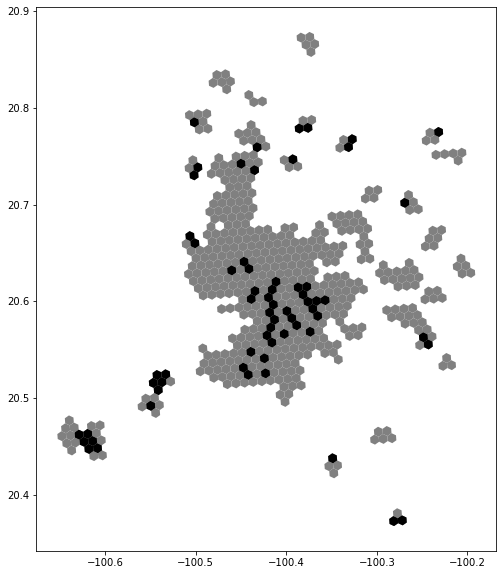

In [84]:
fig, ax = plt.subplots(figsize=(20,10))
hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'loss_relation'] = (hex_analysis.T_Pob_10_20*-1) + (round(hex_analysis['prom_ocup'].mean(),2) * (hex_analysis.T_Viv_10_20*(hex_analysis.tvivparhab/hex_analysis.vivtot)))

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'log_loss_relation'] = np.log(hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                                                                                            (hex_analysis.T_Pob_10_20<0),'loss_relation'])

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0)].plot(color='black', ax=ax)

gdf.plot(ax=ax, color='grey', zorder=-1)

# grl_dir = '/workspaces/accesibilidad-urbana/output/figures/viv_change/'
# plt.savefig(grl_dir+f'{city}_PerdidaOportunidad.svg')

<AxesSubplot:>

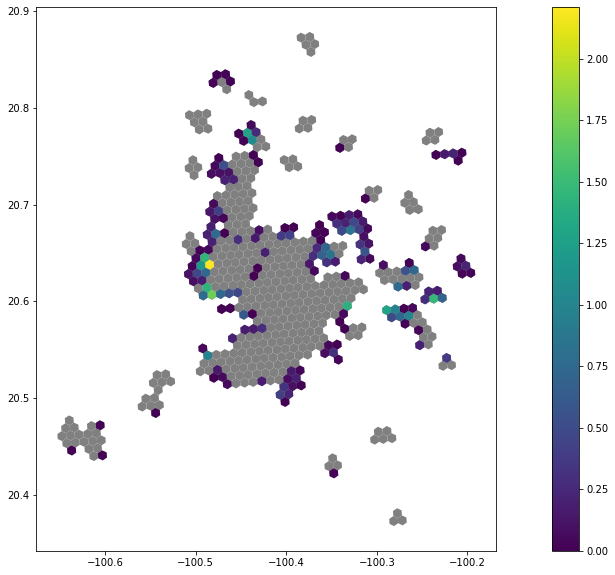

In [85]:
fig, ax = plt.subplots(figsize=(20,10))

hex_analysis.loc[hex_analysis['10_vivtot']==0,'pct_viv_nueva'] = round(100*(hex_analysis['T_Viv_10_20'] / hex_analysis['T_Viv_10_20'].sum()),2)

hex_analysis[hex_analysis['10_vivtot']==0].plot('pct_viv_nueva', legend=True, ax=ax) #### COMPARTIR

gdf.plot(ax=ax, color='grey', zorder=-1)

# grl_dir = '/workspaces/accesibilidad-urbana/output/figures/viv_change/'
# plt.savefig(grl_dir+f'{city}_VivNueva_sinViv2010.svg')

<AxesSubplot:>

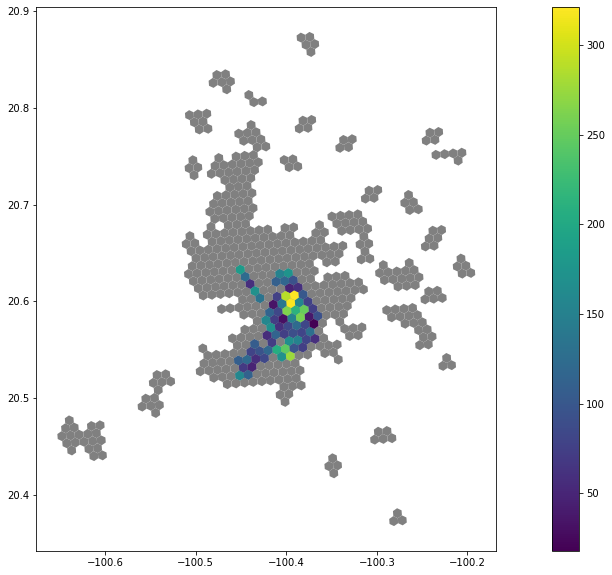

In [86]:
fig, ax = plt.subplots(figsize=(20,10))

hex_analysis[hex_analysis['15_min_analysis']<=15].plot('vivpar_des', legend=True, ax=ax) #### COMPARTIR

gdf.plot(ax=ax, color='grey', zorder=-1)

# grl_dir = '/workspaces/accesibilidad-urbana/output/figures/viv_change/'
# plt.savefig(grl_dir+f'{city}_ViviendaDeshabitada_Poligono15min.svg')

## Zona 20 minutos AGEB

In [87]:
df = pd.read_json("../../scripts/Metropolis_CVE.json")
c = city

In [88]:
year = 2010

#Folder names from database
ageb_schema = 'censoageb'
ageb_folder = f'censoageb_{year}'


# Creates empty GeoDataFrame to store block locations
ageb_censo = gpd.GeoDataFrame()
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {ageb_schema}.{ageb_folder} WHERE \"cve_geo\" LIKE \'{m}%%\'"
    ageb_censo = ageb_censo.append(aup.gdf_from_query(query, geometry_col='geometry'))

ageb_censo = ageb_censo.to_crs("EPSG:4326")
print(ageb_censo.shape)
ageb_censo.head(2)

(459, 206)


,codigo,cve_geo,geog,fecha_act,geom,institut,OID,geometry,censo,cve_ent,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
0,LA_6052,1100400010455,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,13956,"POLYGON ((-100.63993 20.47096, -100.64011 20.4...",2010,11,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LA_6052,1100400010370,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,13957,"POLYGON ((-100.63993 20.47096, -100.63949 20.4...",2010,11,...,NaN,275.0,302.0,264.0,199.0,194.0,47.0,97.0,243.0,27.0


In [89]:
prom_ocup_tot_10 = ageb_censo.prom_ocup.mean()
prom_ocup_tot_10

3.856753812636166

In [90]:
viv_des_tot_10 = ageb_censo.vivpar_des.sum()
viv_des_tot_10

42919.0

In [91]:
ageb_clip = gpd.clip(ageb_censo[['cve_geo','geometry']], hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,['hex_id_8','geometry']])
ageb_clip = ageb_clip.to_crs("EPSG:32613")
ageb_clip['area_ha_clip'] = ageb_clip.area / 10000
ageb_clip = ageb_clip.groupby('cve_geo').sum()
ageb_analysis = pd.merge(ageb_censo[['cve_geo','geometry']], ageb_clip.reset_index(), on='cve_geo')
ageb_analysis = ageb_analysis.to_crs("EPSG:32613")
ageb_analysis['area_ha_ageb'] = ageb_analysis.area / 10000
ageb_analysis['clip_pct'] = (ageb_analysis['area_ha_clip'] / ageb_analysis['area_ha_ageb'])
cvgeo_unique = list(ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].cve_geo.unique())

In [92]:
pobtot_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].pobtot.sum()
pobtot_10

386280

In [93]:
prom_ocup_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].prom_ocup.mean()
prom_ocup_10

3.7246258503401357

In [94]:
vivpar_des_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivpar_des.sum()
vivpar_des_10

13360.0

In [95]:
vivtot_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivtot.sum()
vivtot_10

121387

In [96]:
tvivparhab_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivparhab.sum()
tvivparhab_10

102287.0

In [97]:
tvivpar_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivpar.sum()
tvivpar_10

119610.0

<AxesSubplot:>

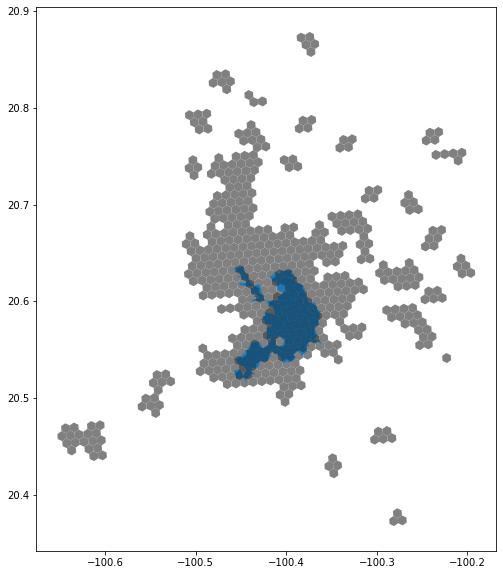

In [98]:
fig, ax = plt.subplots(figsize=(20,10))


ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].to_crs("EPSG:4326").plot(ax=ax)
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].plot(zorder=2, alpha=0.3, color='black',ax=ax)
hex_analysis.plot(zorder=-1, color='grey',ax=ax)

In [99]:
year = 2020

#Folder names from database
ageb_schema = 'censoageb'
ageb_folder = f'censoageb_{year}'


# Creates empty GeoDataFrame to store block locations
ageb_censo = gpd.GeoDataFrame()
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {ageb_schema}.{ageb_folder} WHERE \"cve_geo\" LIKE \'{m}%%\'"
    ageb_censo = ageb_censo.append(aup.gdf_from_query(query, geometry_col='geometry'))

ageb_censo = ageb_censo.to_crs("EPSG:4326")
print(ageb_censo.shape)
ageb_censo.head(2)

(666, 237)


,cve_geo,cve_ent,cve_mun,cve_loc,cve_ageb,geometry,entidad,nom_ent,mun,nom_mun,...,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic,cve_geo_ageb
0,1100400010775,11,004,0001,0775,"POLYGON ((-100.63936 20.47132, -100.63949 20.4...",11,Guanajuato,4,Apaseo el Alto,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100400010775
1,1100400010760,11,004,0001,0760,"POLYGON ((-100.64016 20.47200, -100.64083 20.4...",11,Guanajuato,4,Apaseo el Alto,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100400010760


In [100]:
prom_ocup_tot_20 = ageb_censo.prom_ocup.mean()
prom_ocup_tot_20

3.428151001540832

In [101]:
viv_des_tot_20 = ageb_censo.vivpar_des.sum()
viv_des_tot_20

63202.0

In [102]:
ageb_clip = gpd.clip(ageb_censo[['cve_geo','geometry']], hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,['hex_id_8','geometry']])
ageb_clip = ageb_clip.to_crs("EPSG:32613")
ageb_clip['area_ha_clip'] = ageb_clip.area / 10000
ageb_clip = ageb_clip.groupby('cve_geo').sum()
ageb_analysis = pd.merge(ageb_censo[['cve_geo','geometry']], ageb_clip.reset_index(), on='cve_geo')
ageb_analysis = ageb_analysis.to_crs("EPSG:32613")
ageb_analysis['area_ha_ageb'] = ageb_analysis.area / 10000
ageb_analysis['clip_pct'] = (ageb_analysis['area_ha_clip'] / ageb_analysis['area_ha_ageb'])
cvgeo_unique = list(ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].cve_geo.unique())

In [103]:
pobtot_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].pobtot.sum()
pobtot_20

390513

In [104]:
prom_ocup_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].prom_ocup.mean()
prom_ocup_20

3.3454109589041092

In [105]:
vivpar_des_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivpar_des.sum()
vivpar_des_20

11139.0

In [106]:
vivtot_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivtot.sum()
vivtot_20

131421

In [107]:
tvivparhab_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivparhab.sum()
tvivparhab_20

115940.0

In [108]:
tvivpar_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivpar.sum()
tvivpar_20

125086.0

<AxesSubplot:>

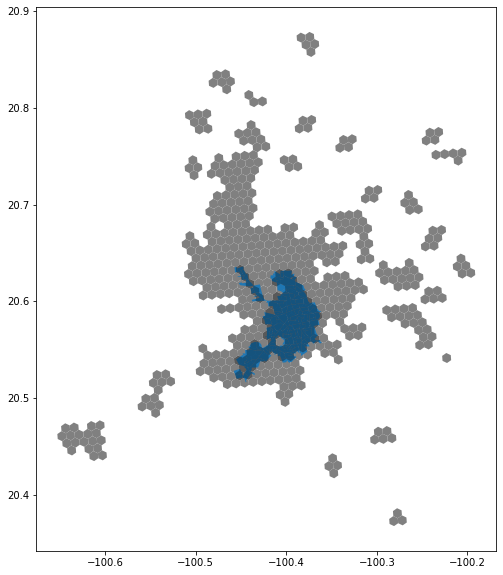

In [109]:
fig, ax = plt.subplots(figsize=(20,10))


ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].to_crs("EPSG:4326").plot(ax=ax)
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].plot(zorder=2, alpha=0.3, color='black',ax=ax)
hex_analysis.plot(zorder=-1, color='grey',ax=ax)

<AxesSubplot:>

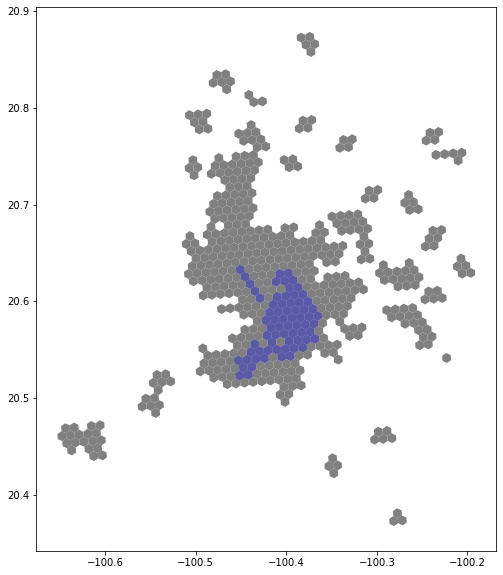

In [110]:
fig, ax = plt.subplots(figsize=(20,10))


hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].dissolve().plot(zorder=2, alpha=0.3, color='blue',ax=ax)
hex_analysis.plot(zorder=-1, color='grey',ax=ax)

# grl_dir = '/workspaces/accesibilidad-urbana/output/figures/viv_change/'
# plt.savefig(grl_dir+f'{city}_Poligono_{tiempo_limite}min.svg')

In [111]:
vivtot_20 - vivtot_10 # vivienda total

10034

In [112]:
vivpar_des_20 / vivtot_20

0.08475814367566827

In [113]:
vivpar_des_20 - vivpar_des_10 # vivienda deshabitada

-2221.0

In [114]:
(vivpar_des_20 - vivpar_des_10)/vivpar_des_10 # vivienda deshabitada

-0.16624251497005987

In [115]:
tvivparhab_20 - tvivparhab_10 # viviendas particulares habitadas

13653.0

In [116]:
tvivpar_20 - tvivpar_10 # total de viviendas particulares

5476.0

In [117]:
vivpar_des_20 / tvivpar_20 # vivpar_des / tvivpar 2020

0.0890507330956302

In [118]:
vivpar_des_20 / vivtot_20 # vivpar_des / vivtot 2020

0.08475814367566827

In [119]:
tvivparhab_20 / tvivpar_20 # tvivparhab / tvivpar 2020

0.9268823049741778

In [120]:
vivpar_des_10 / tvivpar_10 # vivpar_des / tvivpar 2010

0.11169634645932615

In [121]:
vivpar_des_10 / vivtot_10 # vivpar_des / vivtot 2010

0.11006120919044049

In [122]:
tvivparhab_10 / tvivpar_10 # tvivparhab / tvivpar 2010

0.8551709723267286

In [123]:
(vivtot_20 - vivtot_10)/vivtot_10 # vivienda total

0.08266124049527544

In [124]:
prom_ocup_20 - prom_ocup_10 # promedio de ocupantes 2010 vs 2020

-0.3792148914360265

In [129]:
tvivparhab_10 * (prom_ocup_20 - prom_ocup_10)

-38788.75360031684

In [126]:
pobtot_20 - pobtot_10 # poblacion total

4233

In [127]:
-287628.5517396312 + 141513

-146115.55173963122

In [ ]:
(-287628.5517396312+141513) / (tvivparhab_20 - tvivparhab_10)

In [128]:
prom_ocup_20 * vivpar_des_20

37264.532671232875

In [ ]:
datos_estadisticos = {
    'viv_tot_2010' : hex_analysis['10_vivtot'].sum(),
    'viv_tot_2020' : hex_analysis['vivtot'].sum(),
    'cambio_vivtot_10_20' : hex_analysis['T_Viv_10_20'].sum(),
    '%_viv_nueva_10_20' : round(100 * hex_analysis['T_Viv_10_20'].sum() / hex_analysis['10_vivtot'].sum(),2),
    'pob_tot_2010' : hex_analysis['10_pobtot'].sum(),
    'pob_tot_2020' : hex_analysis['pobtot'].sum(),
    'cambio_pobtot_10_20' : hex_analysis['T_Pob_10_20'].sum(),
    '%_pob_nueva_10_20' : round(100*hex_analysis['T_Pob_10_20'].sum() / hex_analysis['10_pobtot'].sum(),2),
    'pob_nueva-viv_nueva' : round(hex_analysis['T_Pob_10_20'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'prom_ocup_10' : prom_ocup_tot_10,
    'prom_ocup_20' : prom_ocup_tot_20,
    'viv20_sin_viv10' : gdf[gdf['10_vivtot']==0]['vivtot'].sum(),
    '%viv20_sinviv10_cambio_vivtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['vivtot'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'pob20_sin_viv10' : gdf[gdf['10_vivtot']==0]['pobtot'].sum(),
    '%pob20_sinviv10_cambio_pobtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['pobtot'].sum() / hex_analysis['T_Pob_10_20'].sum(),2),
    f'cambio_pobtot_10_20_zona_{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum(),
    f'cambio_vivtot_10_20_zona_{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum(),
    f'prom_ocup_20_zona_{tiempo_limite}_min' : prom_ocup_20,
    f'prom_ocup_20_zona_>{tiempo_limite}_min' : prom_ocup_10,
    f'vivienda_deshab_zona_{tiempo_limite}_min' : vivpar_des_20,
    f'vivienda_deshab_zona_>{tiempo_limite}_min' : vivpar_des_10,
    f'cambio_pobtot_10_20_zona_>{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum(),
    f'cambio_vivtot_10_20_zona_>{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum(),
    f'ocupacion_total_zona_{tiempo_limite}_min' : prom_ocup_20 * vivpar_des_20,
    f'perdida_pob_viv_nueva' : perd_pob_viv_nueva,
    f'viv_nueva_perdida_pob' : viv_nueva_perd_pob,
}

In [ ]:
df_est = pd.DataFrame.from_dict(datos_estadisticos, orient='index').reset_index().rename(columns={'index':'Variables',
                                                                                        0:'Valores'})

grl_dir = '/workspaces/accesibilidad-urbana/output/data/viv_change/'
df_est.to_csv(grl_dir + f'{city}_Estadisticos_Cambio_Vivienda.csv')